In [113]:
# from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import mnist

# 데이터를 다운받습니다.
# (x_train, y_train), (x_test, y_test) = cifar10.load_data()
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


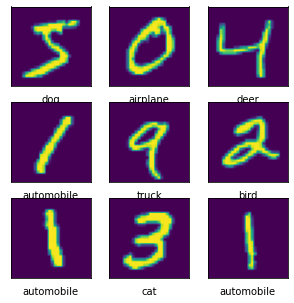

In [114]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(777)

class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse',
    'ship', 'truck'
]

sample_size = 9
random_idx = np.random.randint(60000, size=sample_size)

plt.figure(figsize=(5, 5))
for i, idx in enumerate(random_idx):
    plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(class_names[int(y_train[i])])
plt.show()

In [115]:
# 평균과 표준편차는 채널별로 구해줍니다.
x_mean = np.mean(x_train, axis=(0, 1, 2))
x_std = np.std(x_train, axis=(0, 1, 2))

x_train = (x_train - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

In [116]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train,
                                                  y_train,
                                                  test_size=0.3,
                                                  random_state=777)

print(x_train.shape, len(y_train))
print(x_val.shape, len(y_val))

(42000, 28, 28) 42000
(18000, 28, 28) 18000


In [117]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

model = Sequential()
# (32, 32, 3)의 데이터를 입력으로 받습니다.
# (28, 28, 1)의 데이터를 입력으로 받습니다.
model.add(
    Conv2D(filters=32,
           kernel_size=3,
           padding='same',
           activation='relu',
           input_shape=(28, 28, 1)
           #            input_shape=(32, 32, 3)
           ))
# model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=28, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))

model.add(Conv2D(filters=128, kernel_size=3, padding='same',
                 activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 10개의 출력을 가지는 신경망

In [118]:
model.compile(optimizer=Adam(1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [119]:
history = model.fit(x_train,
                    y_train,
                    epochs=5,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Epoch 1/5
1313/1313 [==============================] - 8s 6ms/step - loss: 0.2479 - acc: 0.9237 - val_loss: 0.0678 - val_acc: 0.9797
Epoch 2/5
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0626 - acc: 0.9805 - val_loss: 0.0491 - val_acc: 0.9850
Epoch 3/5
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0413 - acc: 0.9873 - val_loss: 0.0334 - val_acc: 0.9899
Epoch 4/5
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0307 - acc: 0.9902 - val_loss: 0.0409 - val_acc: 0.9869
Epoch 5/5
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0237 - acc: 0.9925 - val_loss: 0.0333 - val_acc: 0.9892


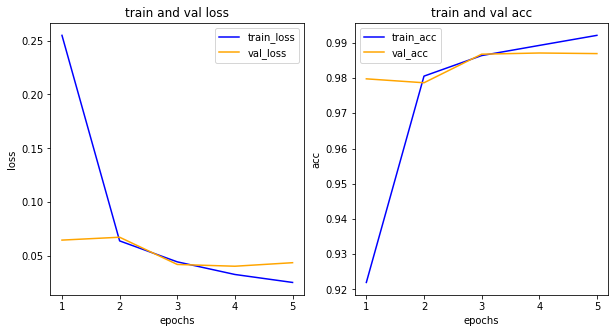

In [92]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='orange', label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color='blue', label='train_acc')
ax2.plot(epochs, val_acc, color='orange', label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

In [93]:
import tensorflow as tf

get_layer_name = [layer.name for layer in model.layers]
get_output = [layer.output for layer in model.layers]

In [94]:
get_layer_name

['conv2d_42',
 'conv2d_43',
 'max_pooling2d_21',
 'conv2d_44',
 'conv2d_45',
 'max_pooling2d_22',
 'conv2d_46',
 'conv2d_47',
 'max_pooling2d_23',
 'flatten_7',
 'dense_14',
 'dense_15']

In [95]:
get_output

[<KerasTensor: shape=(None, 28, 28, 32) dtype=float32 (created by layer 'conv2d_42')>,
 <KerasTensor: shape=(None, 28, 28, 28) dtype=float32 (created by layer 'conv2d_43')>,
 <KerasTensor: shape=(None, 14, 14, 28) dtype=float32 (created by layer 'max_pooling2d_21')>,
 <KerasTensor: shape=(None, 14, 14, 64) dtype=float32 (created by layer 'conv2d_44')>,
 <KerasTensor: shape=(None, 14, 14, 64) dtype=float32 (created by layer 'conv2d_45')>,
 <KerasTensor: shape=(None, 7, 7, 64) dtype=float32 (created by layer 'max_pooling2d_22')>,
 <KerasTensor: shape=(None, 7, 7, 128) dtype=float32 (created by layer 'conv2d_46')>,
 <KerasTensor: shape=(None, 7, 7, 128) dtype=float32 (created by layer 'conv2d_47')>,
 <KerasTensor: shape=(None, 4, 4, 128) dtype=float32 (created by layer 'max_pooling2d_23')>,
 <KerasTensor: shape=(None, 2048) dtype=float32 (created by layer 'flatten_7')>,
 <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'dense_14')>,
 <KerasTensor: shape=(None, 10) dtype=flo

In [106]:
visual_model = tf.keras.models.Model(inputs=model.input, outputs=get_output[2])
visual_model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42_input (InputLayer  [(None, 28, 28, 1)]      0         
 )                                                               
                                                                 
 conv2d_42 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_43 (Conv2D)          (None, 28, 28, 28)        8092      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 14, 14, 28)       0         
 g2D)                                                            
                                                                 
Total params: 8,412
Trainable params: 8,412
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 31ms/step


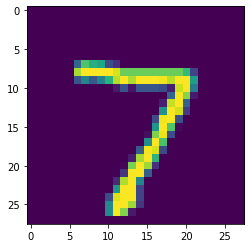

In [107]:
test_img = np.expand_dims(x_test[0], axis=0)
feature_maps = visual_model.predict(test_img)
plt.imshow(x_test[0])

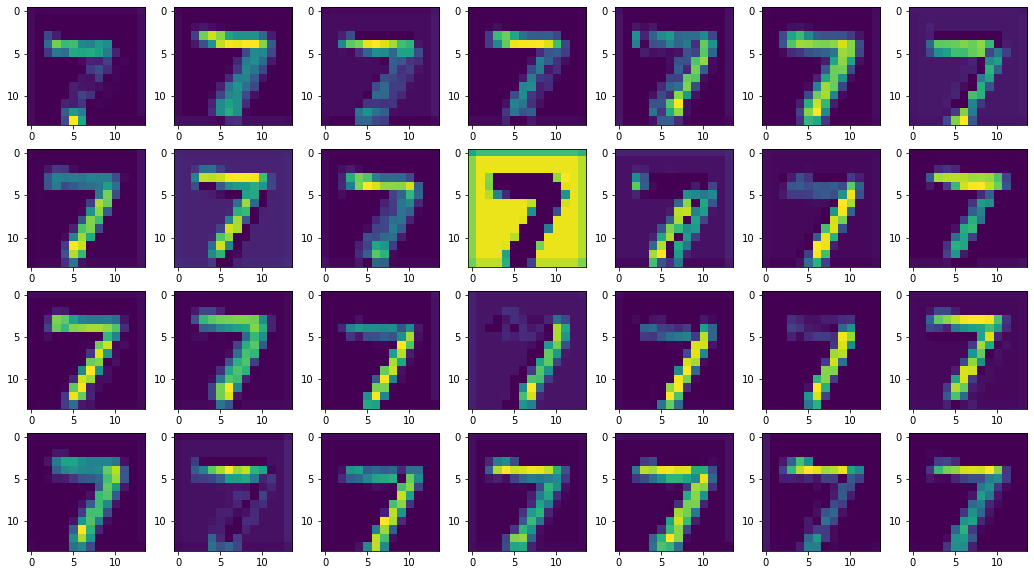

In [108]:
cnt = 1
plt.figure(figsize=(18, 10))
for x in range(28):
    plt.subplot(4, 7, cnt)
    plt.imshow(feature_maps[0, :, :, x])
    cnt += 1

In [109]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_43 (Conv2D)          (None, 28, 28, 28)        8092      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 14, 14, 28)       0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 14, 14, 64)        16192     
                                                                 
 conv2d_45 (Conv2D)          (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                 

1/1 [==============================] - 0s 59ms/step


C:\Users\HP\AppData\Local\Temp\ipykernel_14132\1476549639.py:21: RuntimeWarning: invalid value encountered in divide
  x /= x.std()


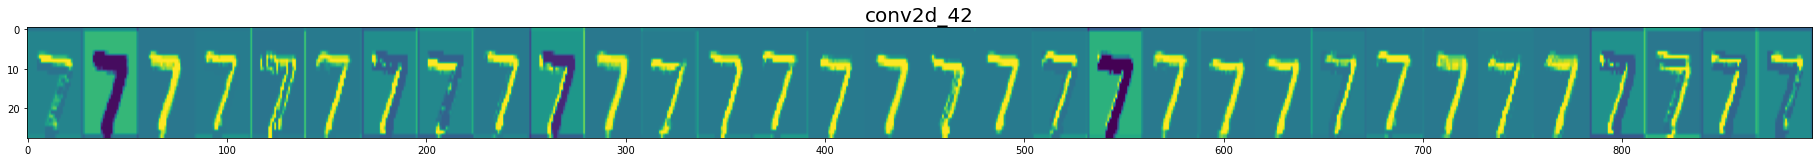

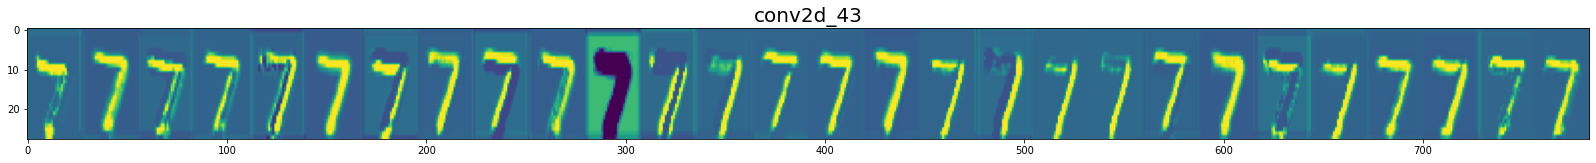

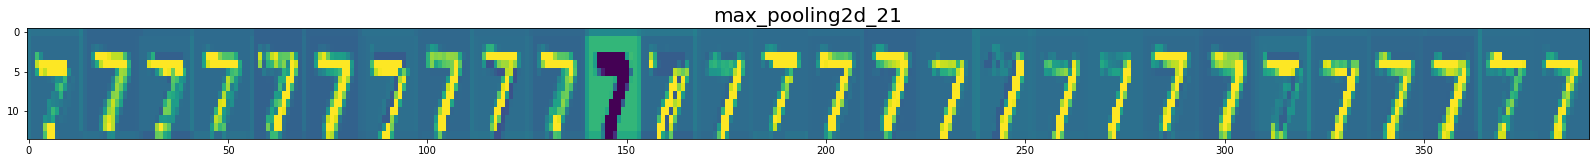

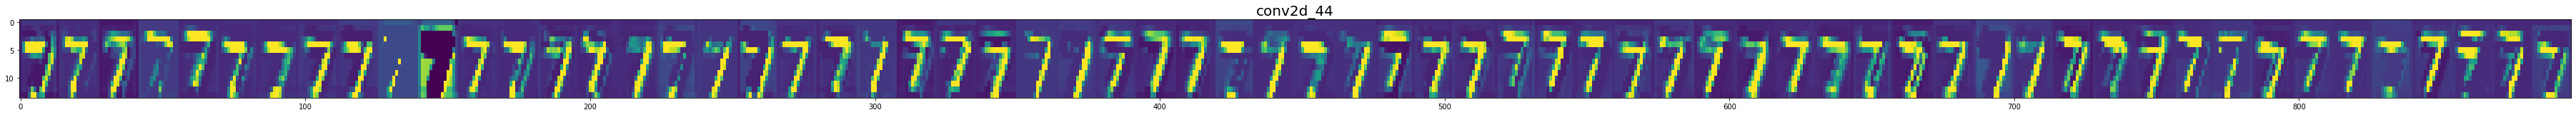

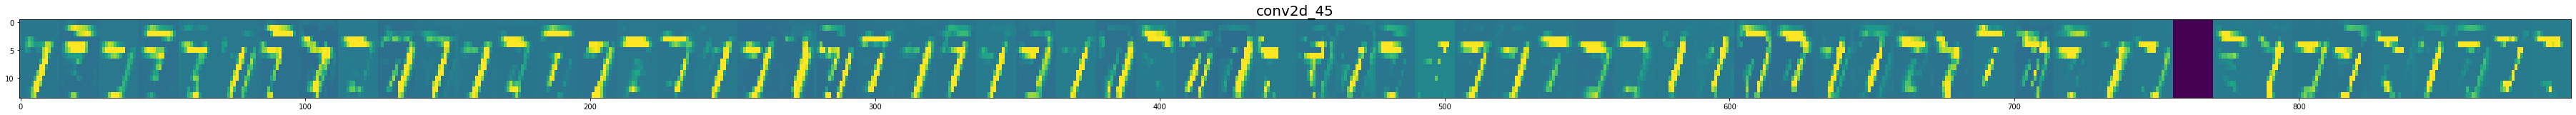

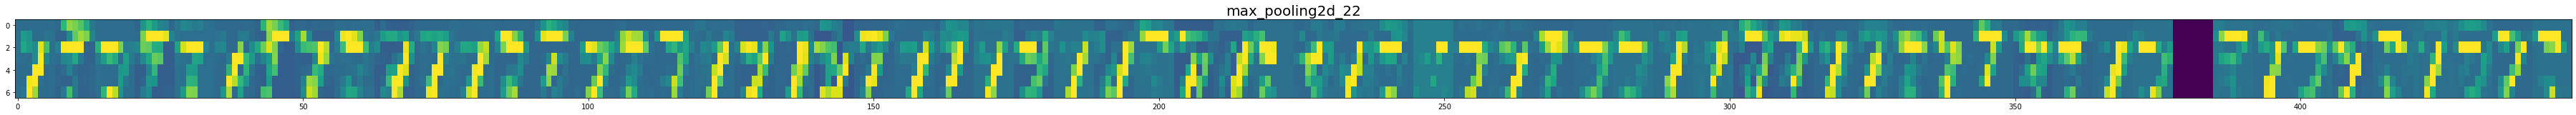

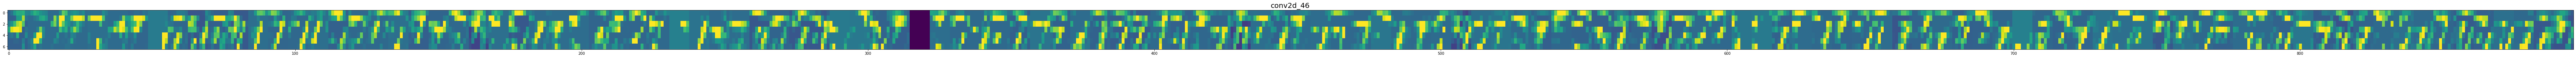

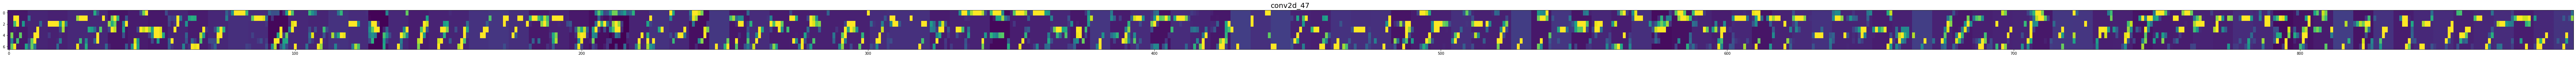

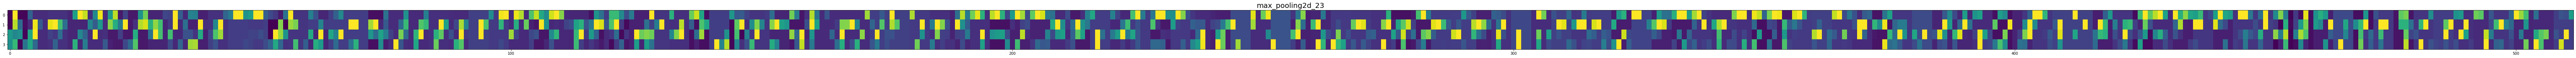

In [110]:
# 모델 전체에서 output을 가져올 수 있습니다.
visual_model = tf.keras.models.Model(inputs=model.input, outputs=get_output)

# 테스트셋의 두 번째 데이터는 '배'입니다.
test_img = np.expand_dims(x_test[0], axis=0)
feature_maps = visual_model.predict(test_img)

for layer_name, feature_map in zip(get_layer_name, feature_maps):
    # Dense 층은 제외합니다.
    if (len(feature_map.shape) == 4):
        img_size = feature_map.shape[1]
        features = feature_map.shape[-1]

        # (img_size, img_size)의 feature_map이 features 개수만큼 존재합니다.
        display_grid = np.zeros((img_size, img_size * features))

        # 각 특징맵을 display_grid 배열에 이어붙입니다.
        for i in range(features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * img_size:(i + 1) * img_size] = x

        plt.figure(figsize=(features, 2 + 1. / features))
        plt.title(layer_name, fontsize=20)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')